# Home Credit Default Risk (HCDR)

## Data Prep

The code in section 1.1 is a repeat of the code in the first EDA notebook in order to bring in the data.

In [1]:
DATA_DIR = "../data/home-credit-default-risk"  # data folder will be present in the level as the code folder

In [2]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # data will be stored in a dictionary

In [3]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


CPU times: user 6min, sys: 16min 14s, total: 22min 15s
Wall time: 26min 6s


In [4]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


In [5]:
appTrainDF = datasets["application_train"]
appTestDF = datasets["application_test"]
bureauDF = datasets["bureau"]
bureauBalDF = datasets["bureau_balance"]
creditCardBalDF = datasets["credit_card_balance"]
installmentPayDF = datasets["installments_payments"]
previousAppDF = datasets["previous_application"]
cashBalDF = datasets["POS_CASH_balance"]

# Overview

Throughout this document, the following occurs.
* The POS cash balance, installment payment, and credit card balance files get rolled up to the previous applications file joined by SK_ID_PREV. So far, only numeric variables are brought in. The min, max, median, mean, and standard deviation are included.
* The bureau balance file gets rolled up to the bureau file joined by SK_ID_BUREAU. Again, only numeric variables are included, specifically the min, max, median, mean, and standard deviation.
* Lastly, the new bureau file, the new previous application file, as well as the POS cash balance, installment payments, and credit card balance files get rolled up to the application train and test files, joining on SK_ID_CURR, using only numeric data (min, max, median, mean, and standard deviation). Note that the POS cash balance, installment payments, and credit card balance files are used twice as they contain both previous and current data.

# Previous Applications Workflow

## POS Cash Balance

In [6]:
cashBalDF.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [7]:
cashBalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [8]:
cashBalDF.shape

(10001358, 8)

## Installment Payments

In [9]:
installmentPayDF.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [10]:
installmentPayDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [11]:
installmentPayDF.shape

(13605401, 8)

## Credit Card Balance

In [12]:
creditCardBalDF.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [13]:
creditCardBalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [14]:
creditCardBalDF.shape

(3840312, 23)

## Previous Applications

In [15]:
previousAppDF.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
previousAppDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [17]:
previousAppDF.shape

(1670214, 37)

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

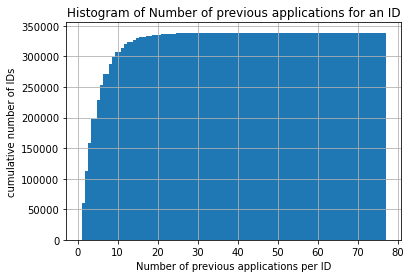

In [18]:
plt.hist(previousAppDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')

In [19]:
apps_all = previousAppDF['SK_ID_CURR'].nunique()
apps_5plus = previousAppDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = previousAppDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


## Join up to Previous Applications

In [20]:
# Create aggregate features
class FeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, grouping_feature = None, features=None, stats = [
#         "min", "max", "mean", "std",
        "median"]):
        self.features = features
        self.grouping_feature = grouping_feature
        self.stats = [
#             "min", "max", "mean", "std",
            "median"]
        self.agg_op_features = {}
        self.agg_features_names = [self.grouping_feature]
        for f in features:
            self.agg_op_features[f] = self.stats
            self.agg_features_names = self.agg_features_names + [f + "_" + s for s in stats]
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        result = X.groupby(self.grouping_feature).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=[self.grouping_feature])
        result.columns = self.agg_features_names
        return result

### POS Cash Balance

In [21]:
#Create feature list, excluding character features.
cash_bal_features = ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']

In [22]:
cash_bal_df = FeaturesAggregater(grouping_feature = "SK_ID_PREV", features = cash_bal_features).transform(cashBalDF)

In [23]:
cash_bal_df

,SK_ID_PREV,MONTHS_BALANCE_median,CNT_INSTALMENT_median,CNT_INSTALMENT_FUTURE_median,SK_DPD_median,SK_DPD_DEF_median
0,1000001,-9.0,12.0,11.0,0.0,0.0
1,1000002,-52.0,6.0,2.0,0.0,0.0
2,1000003,-2.5,12.0,10.5,0.0,0.0
3,1000004,-25.5,10.0,6.5,0.0,0.0
4,1000005,-51.0,10.0,5.0,0.0,0.0
...,...,...,...,...,...,...
936320,2843494,-25.0,48.0,47.0,0.0,0.0
936321,2843495,-12.5,60.0,56.5,0.0,0.0
936322,2843497,-11.0,24.0,14.0,0.0,0.0
936323,2843498,-45.0,36.0,33.0,0.0,0.0


### Installment Payments

In [24]:
#Create feature list, excluding character features.
install_pay_features = ['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 
                        'AMT_INSTALMENT', 'AMT_PAYMENT']

In [25]:
install_pay_df = FeaturesAggregater(grouping_feature = "SK_ID_PREV", 
                                    features = install_pay_features).transform(installmentPayDF)

In [26]:
install_pay_df

,SK_ID_PREV,NUM_INSTALMENT_VERSION_median,NUM_INSTALMENT_NUMBER_median,DAYS_INSTALMENT_median,DAYS_ENTRY_PAYMENT_median,AMT_INSTALMENT_median,AMT_PAYMENT_median
0,1000001,1.5,1.5,-253.0,-269.0,34221.7125,34221.7125
1,1000002,1.0,2.5,-1555.0,-1567.0,6264.0000,6264.0000
2,1000003,1.0,2.0,-64.0,-81.0,4951.3500,4951.3500
3,1000004,1.0,4.0,-772.0,-830.0,3391.1100,3391.1100
4,1000005,1.0,6.0,-1538.0,-1545.0,14713.6050,14713.6050
...,...,...,...,...,...,...,...
997747,2843495,1.0,4.0,-349.0,-349.0,23556.1950,23556.1950
997748,2843496,0.0,16.5,-274.0,-278.0,3513.1950,2468.1150
997749,2843497,1.0,10.5,-303.0,-303.0,9175.1850,9175.1850
997750,2843498,1.0,3.5,-1367.0,-1381.0,16191.9900,16191.9900


### Credit Card Balance

In [27]:
#Create feature list, excluding character features.
cc_bal_features = ['MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 
                   'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 
                   'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 
                   'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 
                   'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 
                   'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF']

In [28]:
cc_bal_df = FeaturesAggregater(grouping_feature = "SK_ID_PREV", features = cc_bal_features).transform(creditCardBalDF)

In [29]:
cc_bal_df

,SK_ID_PREV,MONTHS_BALANCE_median,AMT_BALANCE_median,AMT_CREDIT_LIMIT_ACTUAL_median,AMT_DRAWINGS_ATM_CURRENT_median,AMT_DRAWINGS_CURRENT_median,AMT_DRAWINGS_OTHER_CURRENT_median,AMT_DRAWINGS_POS_CURRENT_median,AMT_INST_MIN_REGULARITY_median,AMT_PAYMENT_CURRENT_median,...,AMT_RECEIVABLE_PRINCIPAL_median,AMT_RECIVABLE_median,AMT_TOTAL_RECEIVABLE_median,CNT_DRAWINGS_ATM_CURRENT_median,CNT_DRAWINGS_CURRENT_median,CNT_DRAWINGS_OTHER_CURRENT_median,CNT_DRAWINGS_POS_CURRENT_median,CNT_INSTALMENT_MATURE_CUM_median,SK_DPD_median,SK_DPD_DEF_median
0,1000018,-4.0,44360.5050,45000,0.0,22827.3300,0.0,22827.33,2250.00,3900.870,...,43376.7600,44360.5050,44360.5050,0.0,11.0,0.0,11.0,2.0,0.0,0.0
1,1000030,-4.5,48036.6675,78750,0.0,13381.6500,0.0,20212.65,2250.00,5022.765,...,47639.0250,48036.6675,48036.6675,0.0,3.5,0.0,4.0,1.5,0.0,0.0
2,1000031,-8.5,2902.7475,144000,0.0,3382.6725,0.0,2862.00,225.00,7200.000,...,2902.7475,2902.7475,2902.7475,0.0,2.0,0.0,1.0,2.5,0.0,0.0
3,1000035,-4.0,0.0000,225000,NaN,0.0000,NaN,NaN,0.00,NaN,...,0.0000,0.0000,0.0000,NaN,0.0,NaN,NaN,0.0,0.0,0.0
4,1000077,-7.0,0.0000,135000,NaN,0.0000,NaN,NaN,0.00,NaN,...,0.0000,0.0000,0.0000,NaN,0.0,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104302,2843476,-49.0,0.0000,180000,0.0,0.0000,0.0,0.00,0.00,4.365,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,41.0,0.0,0.0
104303,2843477,-43.0,0.0000,0,0.0,0.0000,0.0,0.00,0.00,167.490,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,4.0,0.0,0.0
104304,2843478,-46.5,0.0000,0,0.0,0.0000,0.0,0.00,0.00,150.165,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,10.0,0.0,0.0
104305,2843493,-8.0,68541.1650,135000,0.0,0.0000,0.0,0.00,3296.25,4500.000,...,64864.6650,67371.2100,67371.2100,0.0,0.0,0.0,0.0,6.0,0.0,0.0


### Join together

In [30]:
#This takes a long time.

merge_all_data = True

if merge_all_data:
    prev_apps_all_df = previousAppDF.merge(cash_bal_df, how='left', on='SK_ID_PREV')
    prev_apps_all_df = prev_apps_all_df.merge(install_pay_df, how='left', on='SK_ID_PREV')
    prev_apps_all_df = prev_apps_all_df.merge(cc_bal_df, how='left', on='SK_ID_PREV')

In [31]:
prev_apps_all_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,AMT_RECEIVABLE_PRINCIPAL_median,AMT_RECIVABLE_median,AMT_TOTAL_RECEIVABLE_median,CNT_DRAWINGS_ATM_CURRENT_median,CNT_DRAWINGS_CURRENT_median,CNT_DRAWINGS_OTHER_CURRENT_median,CNT_DRAWINGS_POS_CURRENT_median,CNT_INSTALMENT_MATURE_CUM_median,SK_DPD_median_y,SK_DPD_DEF_median_y
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#This should be true
len(prev_apps_all_df) == len(previousAppDF)

True

# Bureau Workflow

## Bureau_Balance

In [33]:
bureauBalDF.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [34]:
bureauBalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [35]:
bureauBalDF.shape

(27299925, 3)

## Bureau

In [36]:
bureauDF.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [37]:
bureauDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [38]:
bureauDF.shape

(1716428, 17)

## Join up to Bureau

### Bureau Balance

In [39]:
#Create feature list, excluding character features.
bur_bal_features = ['MONTHS_BALANCE']

In [40]:
bur_bal_df = FeaturesAggregater(grouping_feature = "SK_ID_BUREAU", features = bur_bal_features).transform(bureauBalDF)

In [41]:
bur_bal_df

,SK_ID_BUREAU,MONTHS_BALANCE_median
0,5001709,-48.0
1,5001710,-41.0
2,5001711,-1.5
3,5001712,-9.0
4,5001713,-10.5
...,...,...
817390,6842884,-23.5
817391,6842885,-11.5
817392,6842886,-16.0
817393,6842887,-18.0


### Join Together

In [42]:
#This takes a long time.

merge_all_data = True

if merge_all_data:
    bureau_all_df = bureauDF.merge(bur_bal_df, how='left', on='SK_ID_BUREAU')

In [43]:
bureau_all_df

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE_median
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN,NaN


In [44]:
#This should be true
len(bureau_all_df) == len(bureauDF)

True

# Applications Workflow

## Applications - Train

In [45]:
appTrainDF.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
appTrainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [47]:
appTrainDF.shape

(307511, 122)

## Applications - Test

In [48]:
appTestDF.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
appTestDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [50]:
appTestDF.shape

(48744, 121)

## Join up to Applications Train

### POS Cash Balance

In [51]:
cash_bal_df_2 = FeaturesAggregater(grouping_feature = "SK_ID_CURR", features = cash_bal_features).transform(cashBalDF)

In [52]:
cash_bal_df_2

,SK_ID_CURR,MONTHS_BALANCE_median,CNT_INSTALMENT_median,CNT_INSTALMENT_FUTURE_median,SK_DPD_median,SK_DPD_DEF_median
0,100001,-57.0,4.0,1.0,0.0,0.0
1,100002,-10.0,24.0,15.0,0.0,0.0
2,100003,-26.5,12.0,6.0,0.0,0.0
3,100004,-25.5,4.0,2.5,0.0,0.0
4,100005,-20.0,12.0,7.5,0.0,0.0
...,...,...,...,...,...,...
337247,456251,-5.0,8.0,4.5,0.0,0.0
337248,456252,-79.0,6.0,3.0,0.0,0.0
337249,456253,-90.0,6.0,2.0,0.0,0.0
337250,456254,-5.5,14.0,10.5,0.0,0.0


### Installment Payments

In [53]:
install_pay_df_2 = FeaturesAggregater(grouping_feature = "SK_ID_CURR", 
                                    features = install_pay_features).transform(installmentPayDF)

In [54]:
install_pay_df_2

,SK_ID_CURR,NUM_INSTALMENT_VERSION_median,NUM_INSTALMENT_NUMBER_median,DAYS_INSTALMENT_median,DAYS_ENTRY_PAYMENT_median,AMT_INSTALMENT_median,AMT_PAYMENT_median
0,100001,1.0,3.0,-1709.0,-1715.0,3980.925,3980.925
1,100002,1.0,10.0,-295.0,-312.0,9251.775,9251.775
2,100003,1.0,5.0,-797.0,-806.0,64275.615,64275.615
3,100004,1.0,2.0,-754.0,-763.0,5357.250,5357.250
4,100005,1.0,5.0,-586.0,-585.0,4813.200,4813.200
...,...,...,...,...,...,...,...
339582,456251,1.0,4.0,-120.0,-166.0,6605.910,6605.910
339583,456252,1.0,3.5,-2391.0,-2392.0,10074.465,10074.465
339584,456253,1.0,3.5,-2737.0,-2743.0,3973.095,3973.095
339585,456254,1.0,5.0,-141.0,-167.0,2296.440,2296.440


### Credit Card Balance

In [55]:
cc_bal_df_2 = FeaturesAggregater(grouping_feature = "SK_ID_CURR", features = cc_bal_features).transform(creditCardBalDF)

In [56]:
cc_bal_df_2

,SK_ID_CURR,MONTHS_BALANCE_median,AMT_BALANCE_median,AMT_CREDIT_LIMIT_ACTUAL_median,AMT_DRAWINGS_ATM_CURRENT_median,AMT_DRAWINGS_CURRENT_median,AMT_DRAWINGS_OTHER_CURRENT_median,AMT_DRAWINGS_POS_CURRENT_median,AMT_INST_MIN_REGULARITY_median,AMT_PAYMENT_CURRENT_median,...,AMT_RECEIVABLE_PRINCIPAL_median,AMT_RECIVABLE_median,AMT_TOTAL_RECEIVABLE_median,CNT_DRAWINGS_ATM_CURRENT_median,CNT_DRAWINGS_CURRENT_median,CNT_DRAWINGS_OTHER_CURRENT_median,CNT_DRAWINGS_POS_CURRENT_median,CNT_INSTALMENT_MATURE_CUM_median,SK_DPD_median,SK_DPD_DEF_median
0,100006,-3.5,0.0000,270000,NaN,0.000,NaN,NaN,0.0000,NaN,...,0.0000,0.000,0.000,NaN,0.0,NaN,NaN,0.0,0.0,0.0
1,100011,-38.5,0.0000,180000,0.0,0.000,0.0,0.000,0.0000,563.355,...,0.0000,0.000,0.000,0.0,0.0,0.0,0.0,33.0,0.0,0.0
2,100013,-48.5,0.0000,157500,0.0,0.000,0.0,0.000,0.0000,274.320,...,0.0000,0.000,0.000,0.0,0.0,0.0,0.0,22.0,0.0,0.0
3,100021,-10.0,0.0000,675000,NaN,0.000,NaN,NaN,0.0000,NaN,...,0.0000,0.000,0.000,NaN,0.0,NaN,NaN,0.0,0.0,0.0
4,100023,-7.5,0.0000,135000,NaN,0.000,NaN,NaN,0.0000,NaN,...,0.0000,0.000,0.000,NaN,0.0,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103553,456244,-21.0,0.0000,450000,0.0,0.000,0.0,0.000,0.0000,154.260,...,0.0000,0.000,0.000,0.0,0.0,0.0,0.0,17.0,0.0,0.0
103554,456246,-5.5,753.4125,135000,0.0,526.275,0.0,526.275,2250.0000,18000.000,...,752.0625,753.165,753.165,0.0,0.5,0.0,0.5,3.5,0.0,0.0
103555,456247,-49.0,0.0000,180000,0.0,0.000,0.0,0.000,0.0000,520.605,...,0.0000,0.000,0.000,0.0,0.0,0.0,0.0,32.0,0.0,0.0
103556,456248,-13.0,0.0000,900000,NaN,0.000,NaN,NaN,0.0000,NaN,...,0.0000,0.000,0.000,NaN,0.0,NaN,NaN,0.0,0.0,0.0


### Previous Applications

For features that have multiples min/max/median etc in name - first is related to lowest level on data tree, second to mid level.

In [57]:
prev_apps_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670214 entries, 0 to 1670213
Data columns (total 68 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   SK_ID_PREV                         1670214 non-null  int64  
 1   SK_ID_CURR                         1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE                 1670214 non-null  object 
 3   AMT_ANNUITY                        1297979 non-null  float64
 4   AMT_APPLICATION                    1670214 non-null  float64
 5   AMT_CREDIT                         1670213 non-null  float64
 6   AMT_DOWN_PAYMENT                   774370 non-null   float64
 7   AMT_GOODS_PRICE                    1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START         1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START            1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT        1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY  

In [58]:
prevapp_features = ['AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'MONTHS_BALANCE_median_x', 
       'CNT_INSTALMENT_median', 'CNT_INSTALMENT_FUTURE_median', 'SK_DPD_median_x', 'SK_DPD_DEF_median_x', 
       'NUM_INSTALMENT_VERSION_median', 'NUM_INSTALMENT_NUMBER_median', 'DAYS_INSTALMENT_median', 
       'DAYS_ENTRY_PAYMENT_median', 'AMT_INSTALMENT_median', 'AMT_PAYMENT_median', 'MONTHS_BALANCE_median_y',
       'AMT_BALANCE_median', 'AMT_CREDIT_LIMIT_ACTUAL_median', 'AMT_DRAWINGS_ATM_CURRENT_median', 
       'AMT_DRAWINGS_CURRENT_median', 'AMT_DRAWINGS_OTHER_CURRENT_median', 'AMT_DRAWINGS_POS_CURRENT_median', 
       'AMT_INST_MIN_REGULARITY_median', 'AMT_PAYMENT_CURRENT_median', 'AMT_PAYMENT_TOTAL_CURRENT_median', 
       'AMT_RECEIVABLE_PRINCIPAL_median', 'AMT_RECIVABLE_median', 'AMT_TOTAL_RECEIVABLE_median', 
       'CNT_DRAWINGS_ATM_CURRENT_median', 'CNT_DRAWINGS_CURRENT_median', 'CNT_DRAWINGS_OTHER_CURRENT_median', 
       'CNT_DRAWINGS_POS_CURRENT_median', 'CNT_INSTALMENT_MATURE_CUM_median', 'SK_DPD_median_y', 'SK_DPD_DEF_median_y']

In [59]:
prev_app_all_df_2 = FeaturesAggregater(grouping_feature = "SK_ID_CURR", 
                                       features = prevapp_features).transform(prev_apps_all_df)

In [60]:
prev_app_all_df_2

,SK_ID_CURR,AMT_ANNUITY_median,AMT_APPLICATION_median,AMT_CREDIT_median,AMT_DOWN_PAYMENT_median,AMT_GOODS_PRICE_median,HOUR_APPR_PROCESS_START_median,NFLAG_LAST_APPL_IN_DAY_median,RATE_DOWN_PAYMENT_median,RATE_INTEREST_PRIMARY_median,...,AMT_RECEIVABLE_PRINCIPAL_median_median,AMT_RECIVABLE_median_median,AMT_TOTAL_RECEIVABLE_median_median,CNT_DRAWINGS_ATM_CURRENT_median_median,CNT_DRAWINGS_CURRENT_median_median,CNT_DRAWINGS_OTHER_CURRENT_median_median,CNT_DRAWINGS_POS_CURRENT_median_median,CNT_INSTALMENT_MATURE_CUM_median_median,SK_DPD_median_y_median,SK_DPD_DEF_median_y_median
0,100001,3951.0000,24835.50,23787.00,2520.00,24835.50,13.0,1.0,0.104326,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100002,9251.7750,179055.00,179055.00,0.00,179055.00,9.0,1.0,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100003,64567.6650,337500.00,348637.50,3442.50,337500.00,15.0,1.0,0.050030,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100004,5357.2500,24282.00,20106.00,4860.00,24282.00,5.0,1.0,0.212008,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100005,4813.2000,22308.75,20076.75,4464.00,44617.50,10.5,1.0,0.108964,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,456251,6605.9100,40455.00,40455.00,0.00,40455.00,17.0,1.0,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338853,456252,10074.4650,57595.50,56821.50,3456.00,57595.50,10.0,1.0,0.062443,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338854,456253,4770.4050,24162.75,20625.75,4403.25,24162.75,11.5,1.0,0.214316,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338855,456254,10681.1325,121317.75,134439.75,0.00,121317.75,15.0,1.0,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Bureau

In [61]:
bureau_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716428 entries, 0 to 1716427
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
 17  MONTHS_BALANCE_median   float64
dtypes: float64(9), int64(6), object(3)
memory usage: 248.8+ MB


In [62]:
bur_features = ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 
                'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 
                'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY', 
#                 'MONTHS_BALANCE_min', 'MONTHS_BALANCE_max', 'MONTHS_BALANCE_mean', 'MONTHS_BALANCE_std',
                'MONTHS_BALANCE_median'
                ]

In [63]:
bureau_all_df_2 = FeaturesAggregater(grouping_feature = "SK_ID_CURR", 
                                       features = bur_features).transform(bureau_all_df)

In [64]:
bureau_all_df_2

,SK_ID_CURR,DAYS_CREDIT_median,CREDIT_DAY_OVERDUE_median,DAYS_CREDIT_ENDDATE_median,DAYS_ENDDATE_FACT_median,AMT_CREDIT_MAX_OVERDUE_median,CNT_CREDIT_PROLONG_median,AMT_CREDIT_SUM_median,AMT_CREDIT_SUM_DEBT_median,AMT_CREDIT_SUM_LIMIT_median,AMT_CREDIT_SUM_OVERDUE_median,DAYS_CREDIT_UPDATE_median,AMT_ANNUITY_median,MONTHS_BALANCE_median_median
0,100001,-857.0,0.0,-179.0,-715.0,NaN,0.0,168345.00,0.000,0.0,0.0,-155.0,0.0,-14.0
1,100002,-1042.5,0.0,-424.5,-939.0,40.500,0.0,54130.50,0.000,0.0,0.0,-402.5,0.0,-26.0
2,100003,-1205.5,0.0,-480.0,-621.0,0.000,0.0,92576.25,0.000,0.0,0.0,-545.0,NaN,NaN
3,100004,-867.0,0.0,-488.5,-532.5,0.000,0.0,94518.90,0.000,0.0,0.0,-532.0,NaN,NaN
4,100005,-137.0,0.0,122.0,-123.0,0.000,0.0,58500.00,25321.500,0.0,0.0,-31.0,0.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,-1680.0,0.0,-1339.0,-1279.0,0.000,0.0,248692.50,0.000,0.0,0.0,-909.0,NaN,NaN
305807,456250,-824.0,0.0,1797.0,-760.0,0.000,0.0,483349.50,391731.615,0.0,0.0,-31.0,51799.5,-13.5
305808,456253,-919.0,0.0,99.0,-794.0,NaN,0.0,675000.00,85518.000,0.0,0.0,-153.5,58369.5,-15.0
305809,456254,-1104.0,0.0,-859.0,-859.0,NaN,0.0,45000.00,0.000,NaN,0.0,-401.0,0.0,-18.0


### Join to Train

In [65]:
#This takes a long time.

merge_all_data = True

if merge_all_data:
    apps_train_all_data_df = appTrainDF.merge(cash_bal_df_2, how='left', on='SK_ID_CURR')
    apps_train_all_data_df = apps_train_all_data_df.merge(install_pay_df_2, how='left', on='SK_ID_CURR')
    apps_train_all_data_df = apps_train_all_data_df.merge(cc_bal_df_2, how='left', on='SK_ID_CURR')
    apps_train_all_data_df = apps_train_all_data_df.merge(prev_app_all_df_2, how='left', on='SK_ID_CURR')
    apps_train_all_data_df = apps_train_all_data_df.merge(bureau_all_df_2, how='left', on='SK_ID_CURR')

In [66]:
apps_train_all_data_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ENDDATE_FACT_median,AMT_CREDIT_MAX_OVERDUE_median,CNT_CREDIT_PROLONG_median,AMT_CREDIT_SUM_median,AMT_CREDIT_SUM_DEBT_median,AMT_CREDIT_SUM_LIMIT_median,AMT_CREDIT_SUM_OVERDUE_median,DAYS_CREDIT_UPDATE_median,AMT_ANNUITY_median_y,MONTHS_BALANCE_median_median
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-939.0,40.500,0.0,54130.50,0.000,0.0,0.0,-402.5,0.0,-26.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-621.0,0.000,0.0,92576.25,0.000,0.0,0.0,-545.0,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-532.5,0.000,0.0,94518.90,0.000,0.0,0.0,-532.0,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-783.0,0.000,0.0,146250.00,0.000,0.0,0.0,-783.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,-794.0,NaN,0.0,675000.00,85518.000,0.0,0.0,-153.5,58369.5,-15.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,-859.0,NaN,0.0,45000.00,0.000,NaN,0.0,-401.0,0.0,-18.0


In [67]:
#This should be true
len(apps_train_all_data_df) == len(appTrainDF)

True

### Join to Test

In [68]:
#This takes a long time.

# merge_all_data = True

# if merge_all_data:
#     apps_test_all_data_df = appTestDF.merge(cash_bal_df_2, how='left', on='SK_ID_CURR')
#     apps_test_all_data_df = apps_test_all_data_df.merge(install_pay_df_2, how='left', on='SK_ID_CURR')
#     apps_test_all_data_df = apps_test_all_data_df.merge(cc_bal_df_2, how='left', on='SK_ID_CURR')
#     apps_test_all_data_df = apps_test_all_data_df.merge(prev_app_all_df_2, how='left', on='SK_ID_CURR')
#     apps_test_all_data_df = apps_test_all_data_df.merge(bureau_all_df_2, how='left', on='SK_ID_CURR')

In [69]:
# apps_test_all_data_df

In [70]:
#This should be true
# len(apps_test_all_data_df) == len(appTestDF)

# EDA on New Features

## Revised correlation with TARGET column, using full dataset.

In [ ]:
correlations = apps_train_all_data_df.corr()['TARGET'].sort_values()

print('Most Positive Correlations with TARGET - Top 10:')
print(correlations.tail(10))

print('\nMost Negative Correlations with TARGET - Top 10:')
print(correlations.head(10))